# Teste de Reconhecimento de Produtos

Este notebook realiza o treinamento e teste do sistema de reconhecimento de produtos usando métodos PDI.

## Objetivo

- Treinar o sistema usando imagens do `dataset/`
- Testar o sistema usando imagens do `dataset_test/`
- Calcular acurácia por produto e acurácia total
- Gerar relatório em TXT com resultados detalhados


In [ ]:
import cv2
import numpy as np
import os
import sys
from datetime import datetime
from sklearn.neighbors import NearestNeighbors

def encontrar_raiz_projeto():
    diretorio_atual = os.path.abspath(os.getcwd())
    while diretorio_atual != os.path.dirname(diretorio_atual):
        if os.path.exists(os.path.join(diretorio_atual, 'libs')) and os.path.exists(os.path.join(diretorio_atual, 'requirements')):
            return diretorio_atual
        diretorio_atual = os.path.dirname(diretorio_atual)
    raiz_relativa = os.path.abspath(os.path.join(os.getcwd(), '..'))
    if os.path.exists(os.path.join(raiz_relativa, 'libs')):
        return raiz_relativa
    return os.getcwd()

raiz_projeto = encontrar_raiz_projeto()
if raiz_projeto not in sys.path:
    sys.path.insert(0, raiz_projeto)

from libs import features


In [2]:
def carregar_imagens_dataset(dataset_path='dataset'):
    if not os.path.isabs(dataset_path):
        dataset_path = os.path.join(raiz_projeto, dataset_path)
    
    imagens_por_produto = {}
    
    if not os.path.exists(dataset_path):
        print(f"Dataset não encontrado: {dataset_path}")
        return imagens_por_produto
    
    for produto in os.listdir(dataset_path):
        produto_path = os.path.join(dataset_path, produto)
        if os.path.isdir(produto_path):
            imagens = []
            for arquivo in os.listdir(produto_path):
                if arquivo.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
                    caminho_completo = os.path.join(produto_path, arquivo)
                    imagem = cv2.imread(caminho_completo)
                    if imagem is not None:
                        imagens.append((imagem, caminho_completo))
            if imagens:
                imagens_por_produto[produto] = imagens
    
    return imagens_por_produto

print("Função carregar_imagens_dataset() criada")


Função carregar_imagens_dataset() criada


In [3]:
def carregar_imagens_dataset_test(dataset_path='dataset_test'):
    if not os.path.isabs(dataset_path):
        dataset_path = os.path.join(raiz_projeto, dataset_path)
    
    imagens_por_produto = {}
    
    if not os.path.exists(dataset_path):
        print(f"Dataset de teste não encontrado: {dataset_path}")
        return imagens_por_produto
    
    for produto in os.listdir(dataset_path):
        produto_path = os.path.join(dataset_path, produto)
        if os.path.isdir(produto_path):
            imagens = []
            for arquivo in os.listdir(produto_path):
                if arquivo.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
                    caminho_completo = os.path.join(produto_path, arquivo)
                    imagem = cv2.imread(caminho_completo)
                    if imagem is not None:
                        imagens.append((imagem, caminho_completo))
            if imagens:
                imagens_por_produto[produto] = imagens
    
    return imagens_por_produto

print("Função carregar_imagens_dataset_test() criada")


Função carregar_imagens_dataset_test() criada


In [4]:
imagens_treinamento = carregar_imagens_dataset('dataset')
imagens_teste = carregar_imagens_dataset_test('dataset_test')

produtos_treinamento = set(imagens_treinamento.keys())
produtos_teste = set(imagens_teste.keys())
produtos_comuns = produtos_treinamento.intersection(produtos_teste)

print(f"Produtos no dataset de treinamento: {len(produtos_treinamento)}")
print(f"Produtos no dataset de teste: {len(produtos_teste)}")
print(f"Produtos comuns (disponíveis em ambos): {len(produtos_comuns)}")
print(f"\nProdutos comuns: {sorted(produtos_comuns)}")

if len(produtos_comuns) == 0:
    print("\n⚠️ AVISO: Nenhum produto comum encontrado entre treinamento e teste!")
else:
    print(f"\n✓ {len(produtos_comuns)} produtos serão testados")


Produtos no dataset de treinamento: 43
Produtos no dataset de teste: 16
Produtos comuns (disponíveis em ambos): 16

Produtos comuns: ['Apple', 'Banana', 'Beetroot', 'Cabbage', 'Carambula', 'Cocos', 'Corn', 'Dates', 'Eggplant', 'Kiwi', 'Limes', 'Mandarine', 'Pineapple', 'Pitahaya', 'Strawberry', 'Watermelon']

✓ 16 produtos serão testados


In [ ]:
print("Iniciando processamento das imagens de treinamento...")
print("=" * 60)

vetores_treinamento = []
labels_treinamento = []
caminhos_treinamento = []

total_imagens = sum(len(imagens) for produto, imagens in imagens_treinamento.items() if produto in produtos_comuns)
imagens_processadas = 0
imagens_falhadas = 0

for produto in sorted(produtos_comuns):
    if produto not in imagens_treinamento:
        continue
    
    print(f"\nProcessando {produto}...")
    for imagem, caminho in imagens_treinamento[produto]:
        vetor = features.processar_imagem_completa(imagem)
        tamanho_esperado = 192  # Histogramas RGB + HSV
        
        if vetor is not None and len(vetor) == tamanho_esperado:
            vetores_treinamento.append(vetor)
            labels_treinamento.append(produto)
            caminhos_treinamento.append(caminho)
            imagens_processadas += 1
        else:
            imagens_falhadas += 1
        
        if imagens_processadas % 50 == 0:
            print(f"  Processadas: {imagens_processadas}/{total_imagens}")

print("\n" + "=" * 60)
print(f"Treinamento concluído!")
print(f"Imagens processadas com sucesso: {imagens_processadas}")
print(f"Imagens que falharam: {imagens_falhadas}")
print(f"Total de vetores: {len(vetores_treinamento)}")

if len(vetores_treinamento) == 0:
    raise ValueError("Nenhuma imagem foi processada com sucesso!")


Iniciando processamento das imagens de treinamento...

Processando Apple...
  Processadas: 50/2418
  Processadas: 100/2418
  Processadas: 150/2418

Processando Banana...
  Processadas: 200/2418

Processando Beetroot...
  Processadas: 250/2418
  Processadas: 300/2418
  Processadas: 350/2418

Processando Cabbage...
  Processadas: 400/2418

Processando Carambula...
  Processadas: 450/2418
  Processadas: 500/2418
  Processadas: 550/2418
  Processadas: 600/2418

Processando Cocos...
  Processadas: 650/2418
  Processadas: 700/2418
  Processadas: 750/2418

Processando Corn...
  Processadas: 800/2418
  Processadas: 850/2418
  Processadas: 900/2418
  Processadas: 950/2418

Processando Dates...
  Processadas: 1000/2418
  Processadas: 1050/2418
  Processadas: 1100/2418

Processando Eggplant...
  Processadas: 1150/2418
  Processadas: 1200/2418
  Processadas: 1250/2418

Processando Kiwi...
  Processadas: 1300/2418
  Processadas: 1350/2418
  Processadas: 1400/2418

Processando Limes...
  Processadas

In [ ]:
print("Criando matriz de características e treinando KNN...")

feature_matrix = np.vstack(vetores_treinamento)
print(f"Dimensões da matriz de características: {feature_matrix.shape}")

tamanho_esperado = 192
if feature_matrix.shape[1] != tamanho_esperado:
    raise ValueError(f"Vetor de características deve ter {tamanho_esperado} dimensões, mas tem {feature_matrix.shape[1]}")

# Versão simplificada: APENAS histogramas de cor (já normalizados)
# Não precisa de normalização Z-score, histogramas já estão normalizados [0,1]
# Usar distância euclidiana simples ou com pesos leves
feature_matrix_normalizado = feature_matrix.copy()

# Pesos leves: HSV pode ser mais discriminativo para frutas
# RGB: índices 0-95 (96 dims)
# HSV: índices 96-191 (96 dims)
pesos = np.ones(192)
pesos[0:96] = 1.0   # RGB - peso padrão
pesos[96:192] = 1.2  # HSV - peso ligeiramente maior (mais discriminativo para frutas)

feature_matrix_ponderado = feature_matrix_normalizado * pesos

normalizacao_params = {'media': None, 'std': None, 'pesos': pesos}

knn = NearestNeighbors(n_neighbors=min(5, len(vetores_treinamento)), metric='euclidean')
knn.fit(feature_matrix_ponderado)

print("✓ KNN treinado com sucesso!")
print(f"✓ Total de amostras de treinamento: {len(vetores_treinamento)}")
print(f"✓ Produtos únicos: {len(set(labels_treinamento))}")
print(f"✓ Versão SIMPLIFICADA: APENAS Histogramas RGB/HSV (192 dims)")
print(f"✓ Pesos aplicados: RGB(1.0x), HSV(1.2x)")


Criando matriz de características e treinando KNN...
Dimensões da matriz de características: (2415, 30)
✓ KNN treinado com sucesso!
✓ Total de amostras de treinamento: 2415
✓ Produtos únicos: 16
✓ Normalização Z-score aplicada
✓ Pesos aplicados: Forma(1.2x), Cor(2.0x), Textura(1.5x), Gradiente(1.0x)


In [ ]:
print("Iniciando processamento das imagens de teste...")
print("=" * 60)

vetores_teste = []
labels_teste = []
caminhos_teste = []

total_imagens_teste = sum(len(imagens) for produto, imagens in imagens_teste.items() if produto in produtos_comuns)
imagens_processadas_teste = 0
imagens_falhadas_teste = 0

for produto in sorted(produtos_comuns):
    if produto not in imagens_teste:
        continue
    
    print(f"\nProcessando {produto}...")
    for imagem, caminho in imagens_teste[produto]:
        vetor = features.processar_imagem_completa(imagem)
        tamanho_esperado = 192  # Histogramas RGB + HSV
        
        if vetor is not None and len(vetor) == tamanho_esperado:
            vetores_teste.append(vetor)
            labels_teste.append(produto)
            caminhos_teste.append(caminho)
            imagens_processadas_teste += 1
        else:
            imagens_falhadas_teste += 1

print("\n" + "=" * 60)
print(f"Teste concluído!")
print(f"Imagens processadas com sucesso: {imagens_processadas_teste}")
print(f"Imagens que falharam: {imagens_falhadas_teste}")
print(f"Total de vetores de teste: {len(vetores_teste)}")

if len(vetores_teste) == 0:
    raise ValueError("Nenhuma imagem de teste foi processada com sucesso!")


Iniciando processamento das imagens de teste...

Processando Apple...

Processando Banana...

Processando Beetroot...

Processando Cabbage...

Processando Carambula...

Processando Cocos...

Processando Corn...

Processando Dates...

Processando Eggplant...

Processando Kiwi...

Processando Limes...

Processando Mandarine...

Processando Pineapple...

Processando Pitahaya...

Processando Strawberry...

Processando Watermelon...

Teste concluído!
Imagens processadas com sucesso: 64
Imagens que falharam: 0
Total de vetores de teste: 64


In [ ]:
print("Classificando imagens de teste...")
print("=" * 60)

resultados = []
acertos = 0
erros = 0

for i, vetor_teste in enumerate(vetores_teste):
    label_esperado = labels_teste[i]
    caminho = caminhos_teste[i]
    
    # Aplicar normalização e pesos ao vetor de teste
    # Versão simplificada: histogramas já estão normalizados, apenas aplicar pesos
    vetor_teste_ponderado = vetor_teste * normalizacao_params['pesos']
    
    query_vec = vetor_teste_ponderado.reshape(1, -1)
    distances, indices = knn.kneighbors(query_vec)
    
    indices_vizinhos = indices[0]
    distancias_vizinhos = distances[0]
    
    labels_vizinhos = [labels_treinamento[idx] for idx in indices_vizinhos]
    label_predito = labels_vizinhos[0]
    distancia = float(distancias_vizinhos[0])
    
    acertou = (label_predito == label_esperado)
    if acertou:
        acertos += 1
    else:
        erros += 1
    
    resultados.append({
        'caminho': caminho,
        'esperado': label_esperado,
        'predito': label_predito,
        'distancia': distancia,
        'acertou': acertou
    })

total_testes = len(resultados)
acuracia_total = (acertos / total_testes * 100) if total_testes > 0 else 0

print(f"\nClassificação concluída!")
print(f"Total de testes: {total_testes}")
print(f"Acertos: {acertos}")
print(f"Erros: {erros}")
print(f"Acurácia Total: {acuracia_total:.2f}%")

acuracia_por_produto = {}
for produto in produtos_comuns:
    testes_produto = [r for r in resultados if r['esperado'] == produto]
    if testes_produto:
        acertos_produto = sum(1 for r in testes_produto if r['acertou'])
        total_produto = len(testes_produto)
        acuracia_produto = (acertos_produto / total_produto * 100) if total_produto > 0 else 0
        acuracia_por_produto[produto] = {
            'acertos': acertos_produto,
            'total': total_produto,
            'acuracia': acuracia_produto
        }

print("\n" + "=" * 60)
print("ACURÁCIA POR PRODUTO:")
print("=" * 60)
for produto in sorted(produtos_comuns):
    if produto in acuracia_por_produto:
        info = acuracia_por_produto[produto]
        print(f"{produto:20s} : {info['acertos']:3d}/{info['total']:3d} = {info['acuracia']:6.2f}%")


Classificando imagens de teste...

Classificação concluída!
Total de testes: 64
Acertos: 11
Erros: 53
Acurácia Total: 17.19%

ACURÁCIA POR PRODUTO:
Apple                :   1/  5 =  20.00%
Banana               :   0/  4 =   0.00%
Beetroot             :   0/  4 =   0.00%
Cabbage              :   0/  3 =   0.00%
Carambula            :   2/  3 =  66.67%
Cocos                :   0/  2 =   0.00%
Corn                 :   0/  6 =   0.00%
Dates                :   0/  2 =   0.00%
Eggplant             :   2/  5 =  40.00%
Kiwi                 :   0/  2 =   0.00%
Limes                :   0/  2 =   0.00%
Mandarine            :   0/  3 =   0.00%
Pineapple            :   1/  6 =  16.67%
Pitahaya             :   2/  5 =  40.00%
Strawberry           :   3/  7 =  42.86%
Watermelon           :   0/  5 =   0.00%


In [9]:
def gerar_relatorio_txt(resultados, acuracia_total, acuracia_por_produto, caminho_saida='relatorio_reconhecimento.txt'):
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    caminho_final = f"relatorio_reconhecimento_{timestamp}.txt"
    
    with open(caminho_final, 'w', encoding='utf-8') as f:
        f.write("=" * 60 + "\n")
        f.write("RELATÓRIO DE RECONHECIMENTO DE PRODUTOS\n")
        f.write("=" * 60 + "\n")
        f.write(f"Data/Hora: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
        
        total_testes = len(resultados)
        acertos = sum(1 for r in resultados if r['acertou'])
        erros = total_testes - acertos
        
        f.write(f"Total de imagens testadas: {total_testes}\n")
        f.write(f"Acertos: {acertos}\n")
        f.write(f"Erros: {erros}\n")
        f.write(f"Acurácia Total: {acuracia_total:.2f}%\n\n")
        
        f.write("-" * 60 + "\n")
        f.write("ACURÁCIA POR PRODUTO:\n")
        f.write("-" * 60 + "\n")
        
        for produto in sorted(acuracia_por_produto.keys()):
            info = acuracia_por_produto[produto]
            f.write(f"{produto:20s} : {info['acertos']:3d}/{info['total']:3d} = {info['acuracia']:6.2f}%\n")
        
        f.write("\n" + "-" * 60 + "\n")
        f.write("DETALHAMENTO DE ERROS:\n")
        f.write("-" * 60 + "\n")
        
        erros_lista = [r for r in resultados if not r['acertou']]
        if erros_lista:
            f.write(f"{'Imagem':<40s} | {'Esperado':<20s} | {'Predito':<20s} | {'Distância':<10s}\n")
            f.write("-" * 100 + "\n")
            for erro in erros_lista:
                nome_arquivo = os.path.basename(erro['caminho'])
                f.write(f"{nome_arquivo:<40s} | {erro['esperado']:<20s} | {erro['predito']:<20s} | {erro['distancia']:<10.5f}\n")
        else:
            f.write("Nenhum erro encontrado!\n")
        
        f.write("\n" + "=" * 60 + "\n")
        f.write("FIM DO RELATÓRIO\n")
        f.write("=" * 60 + "\n")
    
    print(f"✓ Relatório gerado: {caminho_final}")
    return caminho_final

caminho_relatorio = gerar_relatorio_txt(resultados, acuracia_total, acuracia_por_produto)
print(f"\n✓ Relatório salvo em: {caminho_relatorio}")


✓ Relatório gerado: relatorio_reconhecimento_20251106_102424.txt

✓ Relatório salvo em: relatorio_reconhecimento_20251106_102424.txt


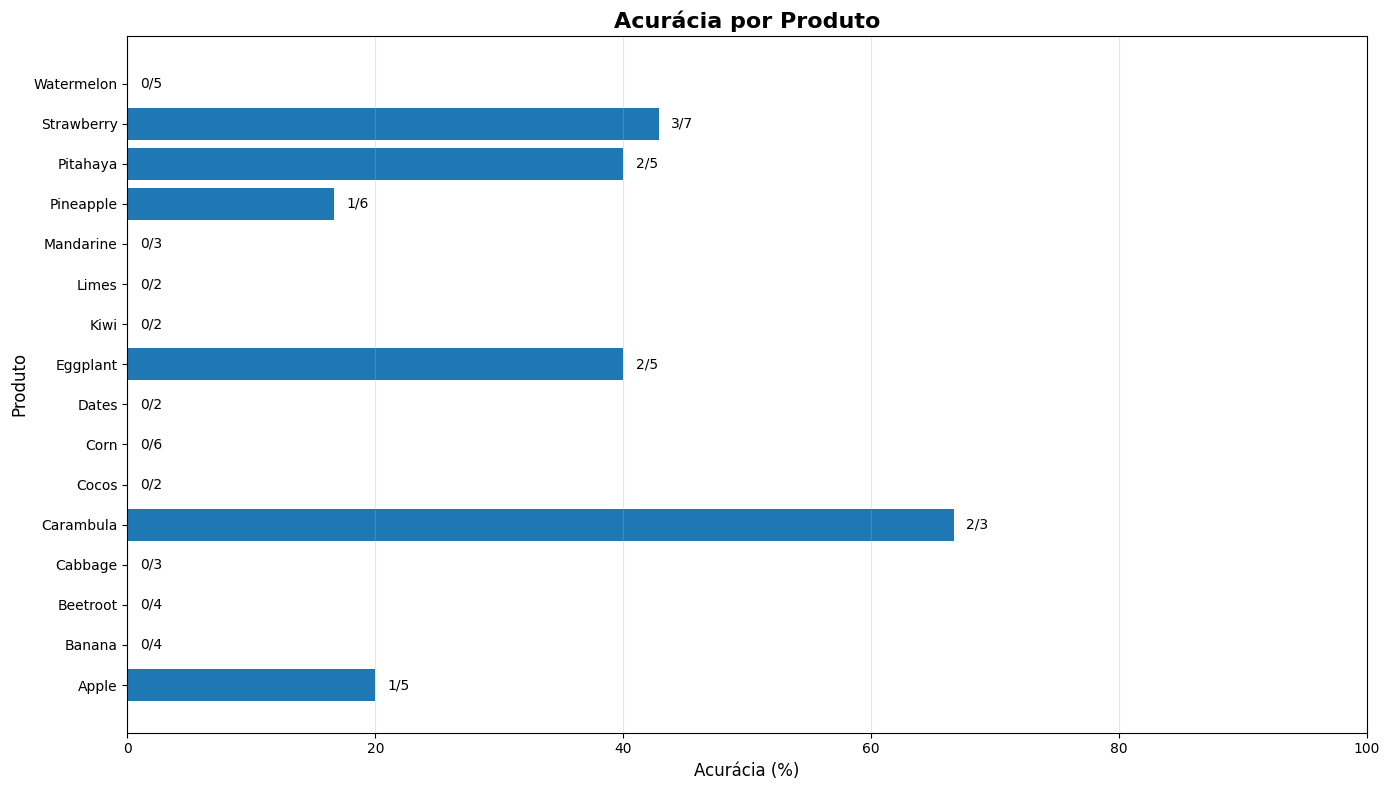


RESUMO FINAL
Acurácia Total: 17.19%
Total de Testes: 64
Acertos: 11
Erros: 53


In [10]:
import matplotlib.pyplot as plt

produtos_ordenados = sorted(acuracia_por_produto.keys())
acuracias = [acuracia_por_produto[p]['acuracia'] for p in produtos_ordenados]

plt.figure(figsize=(14, 8))
plt.barh(produtos_ordenados, acuracias)
plt.xlabel('Acurácia (%)', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.title('Acurácia por Produto', fontsize=16, fontweight='bold')
plt.xlim(0, 100)
plt.grid(axis='x', alpha=0.3)

for i, (produto, acuracia) in enumerate(zip(produtos_ordenados, acuracias)):
    info = acuracia_por_produto[produto]
    plt.text(acuracia + 1, i, f"{info['acertos']}/{info['total']}", 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"RESUMO FINAL")
print(f"{'='*60}")
print(f"Acurácia Total: {acuracia_total:.2f}%")
print(f"Total de Testes: {len(resultados)}")
print(f"Acertos: {acertos}")
print(f"Erros: {erros}")
print(f"{'='*60}")
